In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.cross_decomposition import PLSRegression,PLSCanonical, CCA
from sklearn.model_selection import cross_val_predict
from sklearn import preprocessing
import numpy as np
# from r_pls import PLSCanonical, CCA

In [79]:
from ISLP import load_data
Khan = load_data('Khan')
Khan.keys()

dict_keys(['xtest', 'xtrain', 'ytest', 'ytrain'])

In [80]:
Khan['xtrain']

,G0001,G0002,G0003,G0004,G0005,G0006,G0007,G0008,G0009,G0010,...,G2299,G2300,G2301,G2302,G2303,G2304,G2305,G2306,G2307,V2308
0,0.773344,-2.438405,-0.482562,-2.721135,-1.217058,0.827809,1.342604,0.057042,0.133569,0.565427,...,-0.238511,-0.027474,-1.660205,0.588231,-0.463624,-3.952845,-5.496768,-1.414282,-0.647600,-1.763172
1,-0.078178,-2.415754,0.412772,-2.825146,-0.626236,0.054488,1.429498,-0.120249,0.456792,0.159053,...,-0.657394,-0.246284,-0.836325,-0.571284,0.034788,-2.478130,-3.661264,-1.093923,-1.209320,-0.824395
2,-0.084469,-1.649739,-0.241308,-2.875286,-0.889405,-0.027474,1.159300,0.015676,0.191942,0.496585,...,-0.696352,0.024985,-1.059872,-0.403767,-0.678653,-2.939352,-2.736450,-1.965399,-0.805868,-1.139434
3,0.965614,-2.380547,0.625297,-1.741256,-0.845366,0.949687,1.093801,0.819736,-0.284620,0.994732,...,0.259746,0.357115,-1.893128,0.255107,0.163309,-1.021929,-2.077843,-1.127629,0.331531,-2.179483
4,0.075664,-1.728785,0.852626,0.272695,-1.841370,0.327936,1.251219,0.771450,0.030917,0.278313,...,-0.200404,0.061753,-2.273998,-0.039365,0.368801,-2.566551,-1.675044,-1.082050,-0.965218,-1.836966
5,0.458816,-2.875286,0.135841,0.405398,-2.082647,0.137847,1.733530,0.396424,0.045833,0.352064,...,-1.131342,-1.102018,-1.545994,-0.657780,0.390081,-1.660205,-1.651302,-1.130722,-1.129175,0.041142
6,0.067098,-1.624044,0.519627,0.238229,-1.397558,0.138805,1.825291,-0.305439,-0.052873,-1.242367,...,-1.836339,0.031596,-1.713133,-0.731680,0.380694,-3.051245,-0.250129,-0.364995,-1.969691,-1.421714
7,0.094128,-1.795165,0.702751,0.206038,-1.868209,0.288182,1.406072,0.760338,-0.039053,0.136103,...,-0.319104,0.093126,-2.269150,-0.077853,0.345574,-2.570465,-1.730476,-1.116267,-0.999944,-1.926206
8,0.108316,-1.944911,0.600099,-0.051083,-1.981952,0.119204,1.849116,0.237520,-0.050346,-0.252701,...,-0.390232,-0.408119,-2.422495,-0.263835,-0.633747,-3.107782,-1.942815,-0.118558,-2.691193,-2.221005
9,-0.970747,-2.347582,-0.392006,-0.141218,-1.823250,-0.303540,1.498551,-0.206409,0.144793,-1.572142,...,0.536961,-0.226148,-2.302585,0.235862,-0.930897,-2.519498,-2.444149,-0.055618,-0.924071,-1.918003


In [81]:
x= pd.concat([pd.DataFrame(Khan['xtrain']),pd.DataFrame(Khan['xtest'])])
y= pd.concat([pd.DataFrame(Khan['ytrain']),pd.DataFrame(Khan['ytest'])])

In [83]:
y['Y'].value_counts()

2    29
4    25
3    18
1    11
Name: Y, dtype: int64

In [84]:
total_df = x
total_df['type']=y['Y']
total_df.head()

,G0001,G0002,G0003,G0004,G0005,G0006,G0007,G0008,G0009,G0010,...,G2300,G2301,G2302,G2303,G2304,G2305,G2306,G2307,V2308,type
0,0.773344,-2.438405,-0.482562,-2.721135,-1.217058,0.827809,1.342604,0.057042,0.133569,0.565427,...,-0.027474,-1.660205,0.588231,-0.463624,-3.952845,-5.496768,-1.414282,-0.647600,-1.763172,2
1,-0.078178,-2.415754,0.412772,-2.825146,-0.626236,0.054488,1.429498,-0.120249,0.456792,0.159053,...,-0.246284,-0.836325,-0.571284,0.034788,-2.478130,-3.661264,-1.093923,-1.209320,-0.824395,2
2,-0.084469,-1.649739,-0.241308,-2.875286,-0.889405,-0.027474,1.159300,0.015676,0.191942,0.496585,...,0.024985,-1.059872,-0.403767,-0.678653,-2.939352,-2.736450,-1.965399,-0.805868,-1.139434,2
3,0.965614,-2.380547,0.625297,-1.741256,-0.845366,0.949687,1.093801,0.819736,-0.284620,0.994732,...,0.357115,-1.893128,0.255107,0.163309,-1.021929,-2.077843,-1.127629,0.331531,-2.179483,2
4,0.075664,-1.728785,0.852626,0.272695,-1.841370,0.327936,1.251219,0.771450,0.030917,0.278313,...,0.061753,-2.273998,-0.039365,0.368801,-2.566551,-1.675044,-1.082050,-0.965218,-1.836966,2


In [86]:
total_df.columns = [f'column_{i}' for i in range(1, 2310)]
total_df = total_df.rename(columns={'column_2309': 'type'})
total_df.index = range(83)
total_df.head()

,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,column_10,...,column_2300,column_2301,column_2302,column_2303,column_2304,column_2305,column_2306,column_2307,column_2308,type
0,0.773344,-2.438405,-0.482562,-2.721135,-1.217058,0.827809,1.342604,0.057042,0.133569,0.565427,...,-0.027474,-1.660205,0.588231,-0.463624,-3.952845,-5.496768,-1.414282,-0.647600,-1.763172,0
1,-0.078178,-2.415754,0.412772,-2.825146,-0.626236,0.054488,1.429498,-0.120249,0.456792,0.159053,...,-0.246284,-0.836325,-0.571284,0.034788,-2.478130,-3.661264,-1.093923,-1.209320,-0.824395,0
2,-0.084469,-1.649739,-0.241308,-2.875286,-0.889405,-0.027474,1.159300,0.015676,0.191942,0.496585,...,0.024985,-1.059872,-0.403767,-0.678653,-2.939352,-2.736450,-1.965399,-0.805868,-1.139434,0
3,0.965614,-2.380547,0.625297,-1.741256,-0.845366,0.949687,1.093801,0.819736,-0.284620,0.994732,...,0.357115,-1.893128,0.255107,0.163309,-1.021929,-2.077843,-1.127629,0.331531,-2.179483,0
4,0.075664,-1.728785,0.852626,0.272695,-1.841370,0.327936,1.251219,0.771450,0.030917,0.278313,...,0.061753,-2.273998,-0.039365,0.368801,-2.566551,-1.675044,-1.082050,-0.965218,-1.836966,0


In [85]:
total_df['type'] = total_df['type'].apply(lambda x: 1 if x == 3 else 0)
total_df.head()

,G0001,G0002,G0003,G0004,G0005,G0006,G0007,G0008,G0009,G0010,...,G2300,G2301,G2302,G2303,G2304,G2305,G2306,G2307,V2308,type
0,0.773344,-2.438405,-0.482562,-2.721135,-1.217058,0.827809,1.342604,0.057042,0.133569,0.565427,...,-0.027474,-1.660205,0.588231,-0.463624,-3.952845,-5.496768,-1.414282,-0.647600,-1.763172,0
1,-0.078178,-2.415754,0.412772,-2.825146,-0.626236,0.054488,1.429498,-0.120249,0.456792,0.159053,...,-0.246284,-0.836325,-0.571284,0.034788,-2.478130,-3.661264,-1.093923,-1.209320,-0.824395,0
2,-0.084469,-1.649739,-0.241308,-2.875286,-0.889405,-0.027474,1.159300,0.015676,0.191942,0.496585,...,0.024985,-1.059872,-0.403767,-0.678653,-2.939352,-2.736450,-1.965399,-0.805868,-1.139434,0
3,0.965614,-2.380547,0.625297,-1.741256,-0.845366,0.949687,1.093801,0.819736,-0.284620,0.994732,...,0.357115,-1.893128,0.255107,0.163309,-1.021929,-2.077843,-1.127629,0.331531,-2.179483,0
4,0.075664,-1.728785,0.852626,0.272695,-1.841370,0.327936,1.251219,0.771450,0.030917,0.278313,...,0.061753,-2.273998,-0.039365,0.368801,-2.566551,-1.675044,-1.082050,-0.965218,-1.836966,0


In [87]:
xtrain= pd.DataFrame(Khan['xtrain'])
ytrain= pd.DataFrame(Khan['ytrain'])
train_df = xtrain
train_df['type']=ytrain['Y']
train_df.head()

,G0001,G0002,G0003,G0004,G0005,G0006,G0007,G0008,G0009,G0010,...,G2300,G2301,G2302,G2303,G2304,G2305,G2306,G2307,V2308,type
0,0.773344,-2.438405,-0.482562,-2.721135,-1.217058,0.827809,1.342604,0.057042,0.133569,0.565427,...,-0.027474,-1.660205,0.588231,-0.463624,-3.952845,-5.496768,-1.414282,-0.647600,-1.763172,2
1,-0.078178,-2.415754,0.412772,-2.825146,-0.626236,0.054488,1.429498,-0.120249,0.456792,0.159053,...,-0.246284,-0.836325,-0.571284,0.034788,-2.478130,-3.661264,-1.093923,-1.209320,-0.824395,2
2,-0.084469,-1.649739,-0.241308,-2.875286,-0.889405,-0.027474,1.159300,0.015676,0.191942,0.496585,...,0.024985,-1.059872,-0.403767,-0.678653,-2.939352,-2.736450,-1.965399,-0.805868,-1.139434,2
3,0.965614,-2.380547,0.625297,-1.741256,-0.845366,0.949687,1.093801,0.819736,-0.284620,0.994732,...,0.357115,-1.893128,0.255107,0.163309,-1.021929,-2.077843,-1.127629,0.331531,-2.179483,2
4,0.075664,-1.728785,0.852626,0.272695,-1.841370,0.327936,1.251219,0.771450,0.030917,0.278313,...,0.061753,-2.273998,-0.039365,0.368801,-2.566551,-1.675044,-1.082050,-0.965218,-1.836966,2


In [89]:
train_df.columns = [f'column_{i}' for i in range(1, 2310)]
train_df = train_df.rename(columns={'column_2309': 'type'})
train_df.index = range(63)
train_df['type'] = train_df['type'].apply(lambda x: 1 if x == 3 else 0)
train_df.head()

,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,column_10,...,column_2300,column_2301,column_2302,column_2303,column_2304,column_2305,column_2306,column_2307,column_2308,type
0,0.773344,-2.438405,-0.482562,-2.721135,-1.217058,0.827809,1.342604,0.057042,0.133569,0.565427,...,-0.027474,-1.660205,0.588231,-0.463624,-3.952845,-5.496768,-1.414282,-0.647600,-1.763172,0
1,-0.078178,-2.415754,0.412772,-2.825146,-0.626236,0.054488,1.429498,-0.120249,0.456792,0.159053,...,-0.246284,-0.836325,-0.571284,0.034788,-2.478130,-3.661264,-1.093923,-1.209320,-0.824395,0
2,-0.084469,-1.649739,-0.241308,-2.875286,-0.889405,-0.027474,1.159300,0.015676,0.191942,0.496585,...,0.024985,-1.059872,-0.403767,-0.678653,-2.939352,-2.736450,-1.965399,-0.805868,-1.139434,0
3,0.965614,-2.380547,0.625297,-1.741256,-0.845366,0.949687,1.093801,0.819736,-0.284620,0.994732,...,0.357115,-1.893128,0.255107,0.163309,-1.021929,-2.077843,-1.127629,0.331531,-2.179483,0
4,0.075664,-1.728785,0.852626,0.272695,-1.841370,0.327936,1.251219,0.771450,0.030917,0.278313,...,0.061753,-2.273998,-0.039365,0.368801,-2.566551,-1.675044,-1.082050,-0.965218,-1.836966,0


In [90]:
xtest= pd.DataFrame(Khan['xtest'])
ytest= pd.DataFrame(Khan['ytest'])
test_df = xtest
test_df['type']=ytest['Y']
test_df.head()

,G0001,G0002,G0003,G0004,G0005,G0006,G0007,G0008,G0009,G0010,...,G2300,G2301,G2302,G2303,G2304,G2305,G2306,G2307,V2308,type
0,0.139501,-1.168927,0.564973,-3.366796,-1.323132,-0.692547,2.327395,0.923703,0.112167,0.509765,...,-0.942635,-1.210662,-0.588787,-0.070422,-2.783852,-2.840439,-1.160913,-0.343054,-0.055513,3
1,1.164275,-2.018158,1.103533,-2.165435,-1.440117,-0.437420,2.661587,1.224011,0.210504,1.045563,...,-1.532940,-2.385967,-0.389641,0.422781,-2.816750,-2.422495,-1.722607,-1.703749,-1.699910,2
2,0.841093,0.254720,-0.208748,-2.148149,-1.512765,-1.263723,2.946642,0.087828,0.482920,1.063020,...,-1.854060,-1.541312,-1.773723,-1.879935,-2.265289,-2.405726,-0.176379,-0.128743,-0.996417,4
3,0.685065,-1.927579,-0.233068,-1.640413,-1.008954,0.774451,1.617168,-0.567925,0.036621,-0.101701,...,-0.263966,-1.966113,-1.086190,0.885914,-0.248590,0.385874,-0.508163,-0.626985,-0.699366,2
4,-1.956163,-2.234926,0.281563,-2.695628,-1.214697,-1.059872,2.498070,0.780196,1.041583,0.727500,...,-0.693147,-1.846427,-0.993442,-3.294138,-3.332605,-2.282782,-0.656622,-2.012157,-1.668657,1


In [92]:
test_df.columns = [f'column_{i}' for i in range(1, 2310)]
test_df = test_df.rename(columns={'column_2309': 'type'})
test_df.index = range(20)
test_df['type'] = test_df['type'].apply(lambda x: 1 if x == 3 else 0)
test_df.head()

,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,column_10,...,column_2300,column_2301,column_2302,column_2303,column_2304,column_2305,column_2306,column_2307,column_2308,type
0,0.139501,-1.168927,0.564973,-3.366796,-1.323132,-0.692547,2.327395,0.923703,0.112167,0.509765,...,-0.942635,-1.210662,-0.588787,-0.070422,-2.783852,-2.840439,-1.160913,-0.343054,-0.055513,1
1,1.164275,-2.018158,1.103533,-2.165435,-1.440117,-0.437420,2.661587,1.224011,0.210504,1.045563,...,-1.532940,-2.385967,-0.389641,0.422781,-2.816750,-2.422495,-1.722607,-1.703749,-1.699910,0
2,0.841093,0.254720,-0.208748,-2.148149,-1.512765,-1.263723,2.946642,0.087828,0.482920,1.063020,...,-1.854060,-1.541312,-1.773723,-1.879935,-2.265289,-2.405726,-0.176379,-0.128743,-0.996417,0
3,0.685065,-1.927579,-0.233068,-1.640413,-1.008954,0.774451,1.617168,-0.567925,0.036621,-0.101701,...,-0.263966,-1.966113,-1.086190,0.885914,-0.248590,0.385874,-0.508163,-0.626985,-0.699366,0
4,-1.956163,-2.234926,0.281563,-2.695628,-1.214697,-1.059872,2.498070,0.780196,1.041583,0.727500,...,-0.693147,-1.846427,-0.993442,-3.294138,-3.332605,-2.282782,-0.656622,-2.012157,-1.668657,0


# Main project - PAST

In [117]:
df = pd.read_csv('metadata.csv')
df

,Sample_ID,Clade,Host,Dominant
0,M_c1_C,C,MCAV,Yes
1,M_c3_C,C,MCAV,Yes
2,M_c5_C,C,MCAV,Yes
3,M_c6_C,C,MCAV,No
4,M_c7_C,C,MCAV,Yes
5,M_c8_C,C,MCAV,Yes
6,O_c1_C,C,OANN,Yes
7,O_c2_C,C,OANN,No
8,O_c3_C,C,OANN,Yes
9,O_c6_C,C,OANN,Yes


In [118]:
PAST_df = df[df['Host'] == 'PAST']
PAST_df

,Sample_ID,Clade,Host,Dominant
12,Past_c1_C,C,PAST,No
13,Past_c5_C,C,PAST,No
14,Past_c6_C,C,PAST,No
15,Past_c7_C,C,PAST,No
33,USVI_109_C,C,PAST,No
34,USVI_111_C,C,PAST,No
35,USVI_117_C,C,PAST,No


In [119]:
gene_df = pd.read_csv('normalized_counts_vst.csv',index_col=0)
gene_df

,M_c1_C,M_c3_C,M_c5_C,M_c6_C,M_c7_C,M_c8_C,O_c1_C,O_c2_C,O_c3_C,O_c6_C,...,UVI_105_C,UVI_107_C,USVI_109_C,USVI_111_C,USVI_117_C,UVI_129_C,UVI_131_C,UVI_133_C,UVI_135_C,UVI_137_C
A0A011QK89,3.907570,5.441870,5.331988,5.619051,5.021363,5.048947,4.732517,4.913929,4.576992,4.538450,...,3.891017,4.513440,1.620841,1.620841,1.620841,5.614454,5.048043,5.481919,5.453331,5.524197
A0A023I7E1,1.620841,1.620841,1.620841,1.974893,1.620841,2.155858,2.933164,3.388497,2.793144,3.150154,...,4.609297,2.747603,1.620841,1.620841,1.620841,2.680512,3.206443,3.899187,2.524290,3.624808
A0A067XMP1,3.004398,2.535626,3.125354,2.605541,2.913924,3.438346,6.922549,6.696605,7.024587,7.086066,...,7.601729,7.657521,1.620841,1.620841,6.286627,8.574705,8.216886,8.523557,8.376480,8.869773
A0A067YMX8,2.703474,3.657173,3.570151,3.519751,3.443582,3.396352,1.620841,3.372314,1.620841,1.620841,...,2.786319,3.577300,1.620841,1.620841,1.620841,3.216971,2.002080,1.620841,2.524290,1.620841
A0A075HNX4,2.986870,3.478619,3.630813,2.948207,3.627241,3.646922,2.264749,2.458468,2.263097,2.208325,...,3.154168,2.686010,1.620841,1.620841,1.620841,2.864198,2.851312,3.283753,2.818187,2.356797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
W7JLR6,3.371791,4.232551,4.119319,4.478651,3.930574,3.871036,4.438061,4.834389,3.873575,4.129572,...,3.706404,4.197925,1.620841,1.620841,7.230364,6.810725,7.213774,7.447052,7.375766,7.058057
W7JX98,1.856850,2.173351,2.729975,1.620841,2.567736,2.630471,3.110643,4.641766,2.729293,2.901160,...,2.369726,3.489120,1.620841,1.620841,1.620841,4.121608,4.052953,4.685336,3.955070,4.091370
W7K9M0,2.359892,2.273015,2.684824,2.477620,2.214481,1.930909,2.650763,2.572031,2.688782,3.826660,...,3.548275,2.004912,1.620841,1.620841,1.620841,2.944634,2.797084,4.206408,3.717817,3.129357
W7NDQ0,4.727864,6.026444,5.862211,6.219767,5.709837,5.759675,5.622068,5.402069,5.488106,5.545712,...,6.205976,5.573247,1.620841,1.620841,1.620841,4.675957,3.865413,4.867506,4.684802,4.643401


In [120]:
gene_df = gene_df.T
gene_df

,A0A011QK89,A0A023I7E1,A0A067XMP1,A0A067YMX8,A0A075HNX4,A0A0A0RM07,A0A0B4KGY6,A0A0B6VQ48,A0A0B7P9G0,A0A0G2JDV3,...,S0EMV0,S8GJB7,V6CLA2,W0LYS5,W0TIW1,W7JLR6,W7JX98,W7K9M0,W7NDQ0,X1WER2
M_c1_C,3.907570,1.620841,3.004398,2.703474,2.986870,2.241169,2.521235,3.692186,3.004398,6.353335,...,1.620841,1.620841,1.856850,3.104000,3.119761,3.371791,1.856850,2.359892,4.727864,4.686284
M_c3_C,5.441870,1.620841,2.535626,3.657173,3.478619,2.503367,3.106804,4.619353,4.672777,7.503357,...,1.620841,1.869137,2.976699,3.426356,3.944844,4.232551,2.173351,2.273015,6.026444,6.010146
M_c5_C,5.331988,1.620841,3.125354,3.570151,3.630813,2.891829,2.891829,4.273808,5.297177,7.510740,...,1.948261,2.346861,3.570151,2.414528,3.368204,4.119319,2.729975,2.684824,5.862211,5.935485
M_c6_C,5.619051,1.974893,2.605541,3.519751,2.948207,2.404832,3.137391,4.295079,4.585000,7.673688,...,1.620841,2.544092,2.905994,2.544092,3.662709,4.478651,1.620841,2.477620,6.219767,5.997715
M_c7_C,5.021363,1.620841,2.913924,3.443582,3.627241,2.838415,2.937903,4.301555,4.861119,7.184987,...,1.887821,2.152548,3.050253,2.454656,3.666083,3.930574,2.567736,2.214481,5.709837,5.492568
M_c8_C,5.048947,2.155858,3.438346,3.396352,3.646922,2.673509,3.186723,4.458022,4.726426,7.370989,...,1.930909,2.537347,3.284503,3.079813,3.646922,3.871036,2.630471,1.930909,5.759675,5.397468
O_c1_C,4.732517,2.933164,6.922549,1.620841,2.264749,5.577888,4.111295,3.552054,5.850194,7.033953,...,3.531316,3.466950,2.524211,2.650763,1.620841,4.438061,3.110643,2.650763,5.622068,5.640270
O_c2_C,4.913929,3.388497,6.696605,3.372314,2.458468,5.637551,5.202182,5.379956,5.686338,6.937930,...,3.939571,2.761752,4.049790,3.234313,1.889072,4.834389,4.641766,2.572031,5.402069,5.521292
O_c3_C,4.576992,2.793144,7.024587,1.620841,2.263097,5.272499,4.111187,3.294326,5.740097,6.850679,...,3.154089,3.205545,1.620841,2.715986,1.800330,3.873575,2.729293,2.688782,5.488106,5.394268
O_c6_C,4.538450,3.150154,7.086066,1.620841,2.208325,5.595623,4.221666,3.731320,6.015547,7.021467,...,3.721390,3.353942,2.702051,2.901160,1.620841,4.129572,2.901160,3.826660,5.545712,5.608473


In [121]:
gene_df.index = range(41)

In [122]:
gene_df['Host']=df['Host']
gene_df['Dominant']=df.Dominant
gene_df.head()

,A0A011QK89,A0A023I7E1,A0A067XMP1,A0A067YMX8,A0A075HNX4,A0A0A0RM07,A0A0B4KGY6,A0A0B6VQ48,A0A0B7P9G0,A0A0G2JDV3,...,V6CLA2,W0LYS5,W0TIW1,W7JLR6,W7JX98,W7K9M0,W7NDQ0,X1WER2,Host,Dominant
0,3.907570,1.620841,3.004398,2.703474,2.986870,2.241169,2.521235,3.692186,3.004398,6.353335,...,1.856850,3.104000,3.119761,3.371791,1.856850,2.359892,4.727864,4.686284,MCAV,Yes
1,5.441870,1.620841,2.535626,3.657173,3.478619,2.503367,3.106804,4.619353,4.672777,7.503357,...,2.976699,3.426356,3.944844,4.232551,2.173351,2.273015,6.026444,6.010146,MCAV,Yes
2,5.331988,1.620841,3.125354,3.570151,3.630813,2.891829,2.891829,4.273808,5.297177,7.510740,...,3.570151,2.414528,3.368204,4.119319,2.729975,2.684824,5.862211,5.935485,MCAV,Yes
3,5.619051,1.974893,2.605541,3.519751,2.948207,2.404832,3.137391,4.295079,4.585000,7.673688,...,2.905994,2.544092,3.662709,4.478651,1.620841,2.477620,6.219767,5.997715,MCAV,No
4,5.021363,1.620841,2.913924,3.443582,3.627241,2.838415,2.937903,4.301555,4.861119,7.184987,...,3.050253,2.454656,3.666083,3.930574,2.567736,2.214481,5.709837,5.492568,MCAV,Yes


In [123]:
new_gene_df = pd.read_csv('normalized_gene_counts_twenty_subset.csv',index_col=0)
new_gene_df = new_gene_df.T
new_gene_df.head()

,P58905,Q9S752,O05496,Q0D5B9,Q4UK32,Q9UTR6,Q80W93,Q0WR59,Q27960,Q9DCM0,O52402,Q63120,C0H419,P22944,P43317,Q11208,Q9M907,K9NVA6,Q9H0C1,Q02440
M_c1_C,1.620841,2.630026,2.091298,2.283285,2.146254,3.021643,2.491613,1.620841,1.620841,1.620841,5.371315,2.793084,2.283285,4.962174,3.795321,1.620841,2.932480,1.856850,5.624944,2.241169
M_c3_C,1.620841,3.015490,1.869137,2.049852,2.397577,3.141323,2.915706,2.732385,1.620841,1.620841,5.454003,3.299849,2.397577,4.246878,4.476104,1.620841,2.996271,2.115619,6.046560,2.434535
M_c5_C,1.620841,2.928500,1.948261,2.346861,2.346861,2.637302,3.031392,2.891829,1.620841,1.620841,4.735353,3.343562,2.082899,5.862211,4.477148,1.620841,3.368204,2.185554,5.838272,2.533612
M_c6_C,1.620841,3.102072,2.323751,2.404832,2.404832,3.441658,2.716726,2.716726,1.620841,2.605541,5.769915,3.544730,2.544092,4.862746,4.295079,1.974893,3.414487,2.231059,5.989265,2.323751
M_c7_C,1.620841,2.838415,2.321310,2.152548,2.531796,2.961343,2.567736,2.838415,1.620841,1.620841,5.299909,3.227462,2.081958,5.848940,4.332877,1.620841,2.937903,2.081958,5.686272,2.494180


In [124]:
new_gene_df.index = range(41)
new_gene_df['Host']=df['Host']
new_gene_df['Dominant']=df.Dominant
new_gene_df.head()

,P58905,Q9S752,O05496,Q0D5B9,Q4UK32,Q9UTR6,Q80W93,Q0WR59,Q27960,Q9DCM0,...,C0H419,P22944,P43317,Q11208,Q9M907,K9NVA6,Q9H0C1,Q02440,Host,Dominant
0,1.620841,2.630026,2.091298,2.283285,2.146254,3.021643,2.491613,1.620841,1.620841,1.620841,...,2.283285,4.962174,3.795321,1.620841,2.932480,1.856850,5.624944,2.241169,MCAV,Yes
1,1.620841,3.015490,1.869137,2.049852,2.397577,3.141323,2.915706,2.732385,1.620841,1.620841,...,2.397577,4.246878,4.476104,1.620841,2.996271,2.115619,6.046560,2.434535,MCAV,Yes
2,1.620841,2.928500,1.948261,2.346861,2.346861,2.637302,3.031392,2.891829,1.620841,1.620841,...,2.082899,5.862211,4.477148,1.620841,3.368204,2.185554,5.838272,2.533612,MCAV,Yes
3,1.620841,3.102072,2.323751,2.404832,2.404832,3.441658,2.716726,2.716726,1.620841,2.605541,...,2.544092,4.862746,4.295079,1.974893,3.414487,2.231059,5.989265,2.323751,MCAV,No
4,1.620841,2.838415,2.321310,2.152548,2.531796,2.961343,2.567736,2.838415,1.620841,1.620841,...,2.081958,5.848940,4.332877,1.620841,2.937903,2.081958,5.686272,2.494180,MCAV,Yes


In [130]:
X = new_gene_df.iloc[:, :20]
y = new_gene_df['Host']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

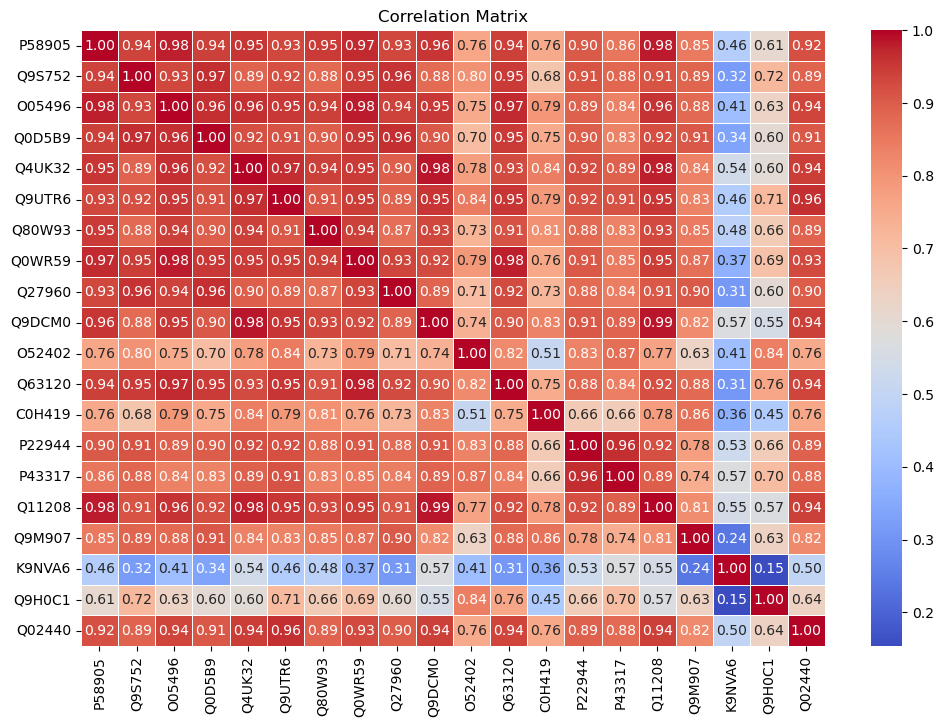

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = X_train.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [132]:
vif_data = pd.DataFrame()
vif_data["Variable"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

print("\nVIF Values:")  # High VIF values indicate potential collinearity.
print(vif_data)


VIF Values:
   Variable         VIF
0    P58905  402.023869
1    Q9S752  299.466863
2    O05496  269.863169
3    Q0D5B9  393.943057
4    Q4UK32  612.724829
5    Q9UTR6  485.177191
6    Q80W93   92.434093
7    Q0WR59  251.763171
8    Q27960  171.300345
9    Q9DCM0  426.633703
10   O52402  119.204342
11   Q63120  741.130494
12   C0H419  201.925283
13   P22944  413.259969
14   P43317  513.163978
15   Q11208  491.329206
16   Q9M907  275.482942
17   K9NVA6   29.882964
18   Q9H0C1   99.546058
19   Q02440  204.982379


# LogisticRegression

In [133]:
model = LogisticRegression(random_state=42,fit_intercept=True)

model.fit(X_train, y_train)

coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)
pred = model.predict(X_test)
predicted_probs = model.predict_proba(X_test)[:,1]
accuracy = model.score(X_test, y_test)

print("Accuracy on the test set:", accuracy)
print("Predicted Probabilities on the test set:")
print(predicted_probs)
print("Predictions on the test set:", pred)

Coefficients: [[-0.13249965  0.16393515 -0.14166473 -0.08960385 -0.14332914  0.10024234
  -0.0544188  -0.00463819 -0.17044229 -0.21548927  0.66889373  0.22646331
  -0.18342229  0.01498498  0.16010569 -0.16592497  0.00375583 -0.23654695
   0.74953514 -0.0683951 ]
 [ 0.28769752  0.19851282  0.6003911   0.1960732  -0.26278286  0.16555313
  -0.11166309 -0.11203317 -0.56298154  0.22571602 -0.53058839  0.32656715
  -0.6499098  -0.01055167 -0.29066678  0.14496094  0.19616218  0.37880271
  -0.05004408  0.29706782]
 [-0.14373882 -0.34391695  0.05665426 -0.25038577  0.25868699 -0.25019294
   0.46639029  0.55816016  0.11124754 -0.3233252   0.01026882 -0.23744738
  -0.24025446  0.68385817  0.0580568  -0.25858097 -0.2966587   0.06516215
  -0.11616699  0.01949903]
 [-0.15178287  0.08610847 -0.72749997 -0.01096677 -0.15455045 -0.13148416
  -0.56284424 -0.36362704  0.5164567   0.04268519 -0.01119234 -0.4111994
   0.28609082 -0.6800437   0.15705155  0.31622695 -0.08322466  0.33430052
  -0.57990097 -0.2

/Users/vinaysaireddymandala/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy on the test set: 0.7777777777777778


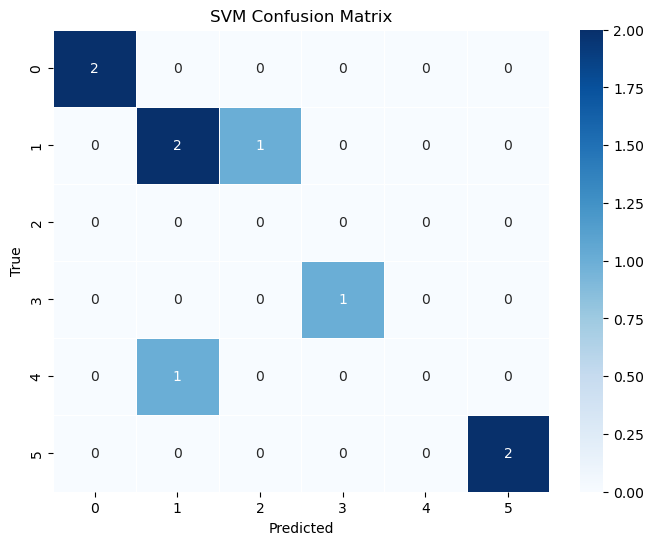

In [134]:
accuracy = accuracy_score(y_test, pred)
cm = confusion_matrix(y_test, pred)
print("Accuracy on the test set:", accuracy)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", linewidths=0.5)
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# LinearDiscriminantAnalysis

Predicted Probabilities on the test set:
[[ 0.99844478  1.00215936  1.00182286  1.00066908  1.00226378  1.00291939]
 [ 1.00049805  0.9971855   0.99687874  0.99833143  0.99551453  1.00340213]
 [ 1.00072539  0.99250487  0.99314968  0.95310605  0.97802952  1.01216362]
 [ 1.00072125  0.99368934  0.99230845  0.98590785  0.98456357  1.00438925]
 [ 0.99867736  1.00205345  1.00178517  1.00061262  1.00197819  1.00374277]
 [ 1.0015481   1.00891077  1.01892628  1.00134531  1.00573378  0.99690409]
 [ 1.00061024  0.99470714  0.99509752  0.99595843  0.99413314  1.01176809]
 [ 1.00374616  1.00451891  1.00488366  1.00102161  1.00389746  0.99450461]
 [ 1.00087352  0.98690777  0.98722206  1.00602612 -8.70152558  1.00695549]]
Predictions on the test set: ['MCAV' 'PAST' 'OFAV' 'OANN' 'MCAV' 'SSID' 'PAST' 'SSID' 'OFAV']
Accuracy on the test set: 0.6666666666666666


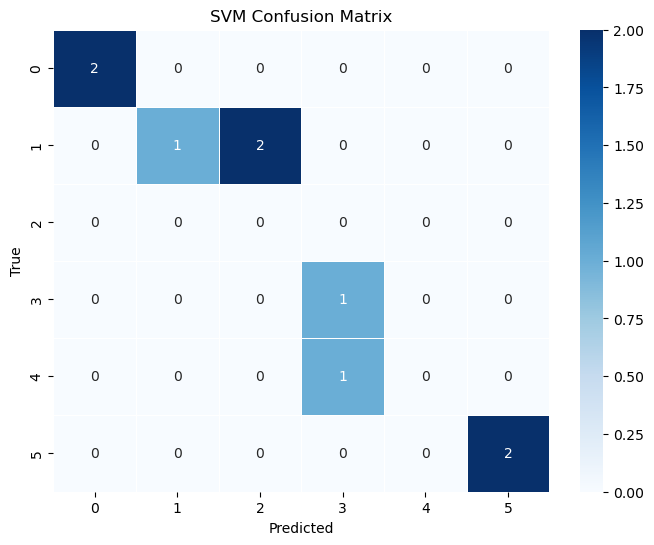

In [135]:
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)
pred = model.predict(X_test)
decision_function_values = model.decision_function(X_test)
predicted_probs = 1 / (1 + (1 / decision_function_values))
print("Predicted Probabilities on the test set:")
print(predicted_probs)
print("Predictions on the test set:", pred)
accuracy = accuracy_score(y_test, pred)
cm = confusion_matrix(y_test, pred)

print("Accuracy on the test set:", accuracy)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", linewidths=0.5)
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [136]:
lda_pred_posterior = model.predict_proba(X_test)
# Number of instances where the predicted posterior probability for class 1 is greater than or equal to 0.5
count_ge_05 = sum(lda_pred_posterior[:, 1] >= 0.5)
print("Number of instances with posterior probability >= 0.5:", count_ge_05)
# Number of instances where the predicted posterior probability for class 1 is less than or equal to 0.5
count_le_05 = sum(lda_pred_posterior[:, 1] <= 0.5)
print("Number of instances with posterior probability <= 0.5:", count_le_05)

print("Posterior probabilities for all instances:")
print(lda_pred_posterior)
count_ge_09 = sum(lda_pred_posterior[:, 1] >= 0.9)
print("Number of instances with posterior probability >= 0.9:", count_ge_09)


Number of instances with posterior probability >= 0.5: 1
Number of instances with posterior probability <= 0.5: 8
Posterior probabilities for all instances:
[[1.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 1.06326900e-106 7.27328573e-122 1.00000000e+000
  3.49489533e-164 0.00000000e+000]
 [0.00000000e+000 3.51450653e-006 9.99996485e-001 7.30342983e-055
  2.34155955e-044 7.90573182e-100]
 [0.00000000e+000 1.00000000e+000 4.41270103e-013 9.97718546e-039
  2.06640838e-041 1.72074390e-168]
 [1.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 9.58660952e-190 5.93138374e-164 0.00000000e+000
  9.47753545e-217 1.00000000e+000]
 [0.00000000e+000 3.94376348e-026 1.34821408e-019 1.00000000e+000
  3.69869126e-034 4.35171024e-145]
 [1.09760122e-195 7.32915277e-176 1.10412571e-168 0.00000000e+000
  3.47533399e-191 1.00000000e+000]
 [0.00000000e+000 1.32538906e-001 8

# QuadraticDiscriminantAnalysis

Predicted Probabilities on the test set:
[0. 1. 1. 0. 0. 0. 0. 0. 1.]
Predictions on the test set: ['MCAV' 'OANN' 'OANN' 'OFAV' 'OFAV' 'OFAV' 'PSTR' 'SSID' 'OANN']
Accuracy on the test set: 0.5555555555555556


/Users/vinaysaireddymandala/anaconda3/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


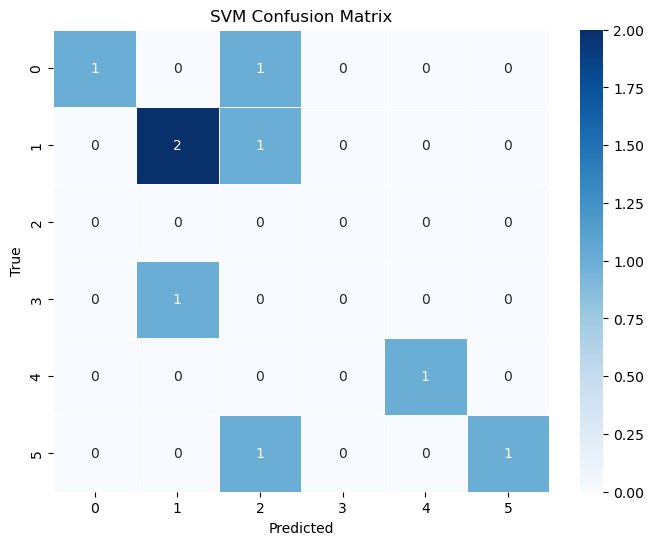

In [137]:
model = QuadraticDiscriminantAnalysis()
model.fit(X_train, y_train)
pred = model.predict(X_test)
predicted_probs = model.predict_proba(X_test)[:, 1]
print("Predicted Probabilities on the test set:")
print(predicted_probs)
print("Predictions on the test set:", pred)
accuracy = accuracy_score(y_test, pred)
cm = confusion_matrix(y_test, pred)

print("Accuracy on the test set:", accuracy)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", linewidths=0.5)
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Support Vector Machine

Accuracy on the test set: 0.6666666666666666


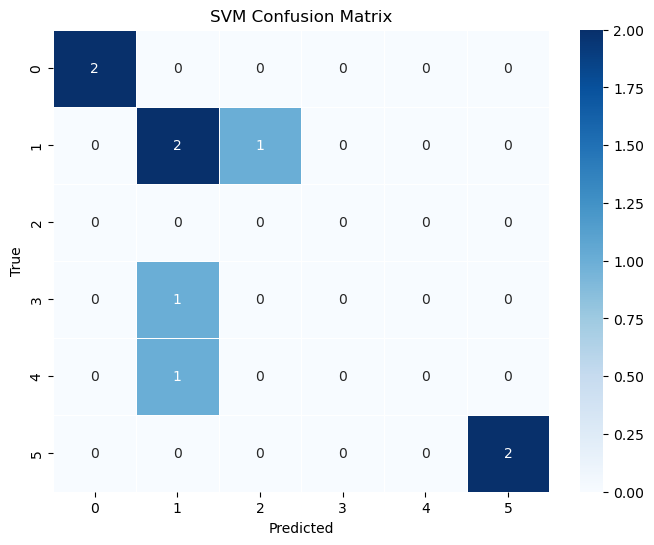

In [138]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, svm_pred)
cm_svm = confusion_matrix(y_test, svm_pred)
print("Accuracy on the test set:", accuracy_svm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, cmap="Blues", fmt="d", linewidths=0.5)
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Partial Least Squares

In [139]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
print("Encoded y_train:")
print(y_train_encoded)
y_test_encoded = label_encoder.transform(y_test)

print("Encoded y_test:")
print(y_test_encoded)


Encoded y_train:
[1 1 3 4 1 3 2 4 3 3 0 1 0 1 0 2 0 0 2 5 0 5 0 3 1 0 4 0 1 3 1 5]
Encoded y_test:
[0 3 1 1 0 5 4 5 1]


Accuracy on the test set: 0.5555555555555556


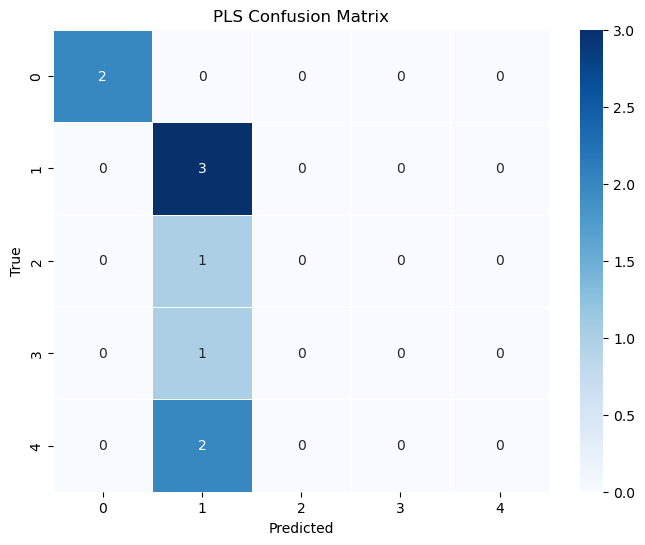

In [140]:
n_components = 2
pls_model = PLSRegression(n_components=n_components)
pls_model.fit(X_train, y_train_encoded)
pls_pred = pls_model.predict(X_test)
pls_pred_labels = [1 if val > 0.5 else 0 for val in pls_pred]
accuracy_pls = accuracy_score(y_test_encoded, pls_pred_labels)
cm_pls = confusion_matrix(y_test_encoded, pls_pred_labels)

print("Accuracy on the test set:", accuracy_pls)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_pls, annot=True, cmap="Blues", fmt="d", linewidths=0.5)
plt.title("PLS Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()